In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy import sparse

In [3]:
label = pd.read_csv("label.csv")
data = sparse.load_npz("tf_idf.npz")

ratio = .7
thr = int(len(label) * ratio)

train_label, train_set = label[: thr].values, data[: thr]
test_label, test_set = label[thr:].values, data[thr:]

In [6]:
logistic = linear_model.LogisticRegression()
logr= logistic.fit(train_set,train_label.ravel())

In [9]:
logr.score(test_set,test_label.ravel())

0.9854716035888327

[[ 2057   315]
 [    4 19581]]


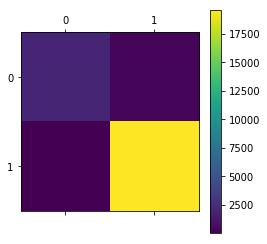

In [10]:
pred = logr.predict(test_set)
labels = ['x', 'y']
cm = confusion_matrix(test_label, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.show()

In [12]:
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

       False       1.00      0.87      0.93      2372
        True       0.98      1.00      0.99     19585

   micro avg       0.99      0.99      0.99     21957
   macro avg       0.99      0.93      0.96     21957
weighted avg       0.99      0.99      0.99     21957



In [13]:
mnb = MultinomialNB()
mnb.fit(train_set,train_label)
mnb.score(test_set,test_label)

0.9568247028282553

[[ 1424   948]
 [    0 19585]]


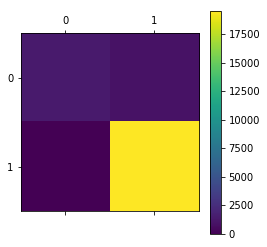

              precision    recall  f1-score   support

       False       1.00      0.60      0.75      2372
        True       0.95      1.00      0.98     19585

   micro avg       0.96      0.96      0.96     21957
   macro avg       0.98      0.80      0.86     21957
weighted avg       0.96      0.96      0.95     21957



In [31]:
pred = mnb.predict(test_set)
labels = ['x', 'y']
cm = confusion_matrix(test_label, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.show()
print(classification_report(test_label, pred))

In [15]:
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

       False       1.00      0.87      0.93      2372
        True       0.98      1.00      0.99     19585

   micro avg       0.99      0.99      0.99     21957
   macro avg       0.99      0.93      0.96     21957
weighted avg       0.99      0.99      0.99     21957



In [28]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(train_set,train_label.ravel())
clf.score(test_set,test_label.ravel())

C:\Users\Gong\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8925171926948126

In [30]:
pred = clf.predict(test_set)
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

       False       1.00      0.01      0.01      2372
        True       0.89      1.00      0.94     19585

   micro avg       0.89      0.89      0.89     21957
   macro avg       0.95      0.50      0.48     21957
weighted avg       0.90      0.89      0.84     21957



In [7]:
model = XGBClassifier(scale_pos_weight=.3)
model.fit(train_set, train_label.ravel())
y_pred = model.predict(test_set)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_label, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.91%


In [27]:
print(classification_report(test_label, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.65      0.78      2372
        True       0.96      1.00      0.98     19585

   micro avg       0.96      0.96      0.96     21957
   macro avg       0.97      0.82      0.88     21957
weighted avg       0.96      0.96      0.96     21957



In [5]:
tot_df = pd.read_csv("data\\all_news.csv", encoding="utf-8")
tot_df.groupby(["topic", "label"])["label"].count()

topic  label
政治     False     2197
       True      6500
生活     False      691
       True     32500
社会     False     4304
       True     13000
经济     False      998
       True     13000
Name: label, dtype: int64